In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [3]:
# Read in the example catalog 
#catalog = pd.read_csv(r"C:\Users\Matthew Salinas\Matthew Salinas\Yihe (2)\Yihe\Yihe\SOULTZ_1993\SSFS 1993 10k.csv")
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/Yihe/SOULTZ_1993/ssfs1993 cat.csv')

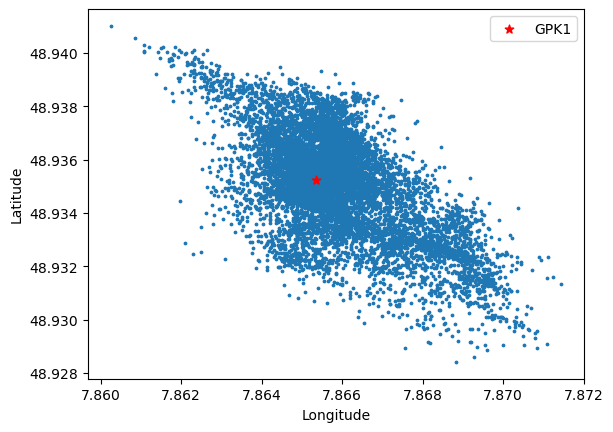

In [4]:
plt.scatter(catalog["Long"],catalog["Lat"],s=3)
GPK1= [7.86535117,48.93525543]
plt.scatter(GPK1[0],GPK1[1],s=40,marker='*',c='r',label='GPK1')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

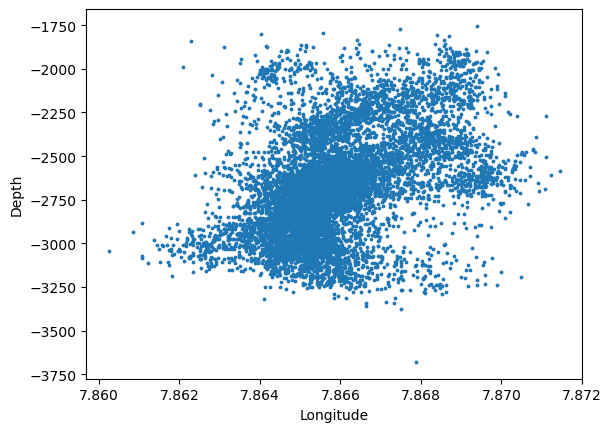

In [5]:
plt.scatter(catalog["Long"],catalog["Elevation"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.show()

In [6]:
# 728173.4014 Start Time or timeda2 0

MwE2 =[]
MwEInj=[]
TE2=[]
TEInj=[]
#dstE2=[]
#dstInj=[]
for i in range(len(catalog["Mw"])):
    if catalog['TimeR'][i]<11.06 or catalog['TimeR'][i]>11.287:
        MwE2.append(catalog['Mw'][i])
        TE2.append(catalog['TimeR'][i])
        #dstE2.append(dist[i])
        if catalog['TimeR'][i] < 15.13360903:
            MwEInj.append(catalog['Mw'][i])
            TEInj.append(catalog['TimeR'][i])
            #dstInj.append(dist[i])

In [7]:
injSt = -1.198290972 #injRt['Time da2'][0]
injEnd = 15.13360903- injSt
print(injEnd)

dt = np.array(catalog['TimeR'].copy())-injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['Mw'], catalog['X'], catalog['Y'], catalog['Z'])
    if injSt-injSt <= d <= injEnd and (d<(11.06-injSt) or d>(11.287-injSt))
])
print(len(magF),len(dt))

16.331900002
10080 10743


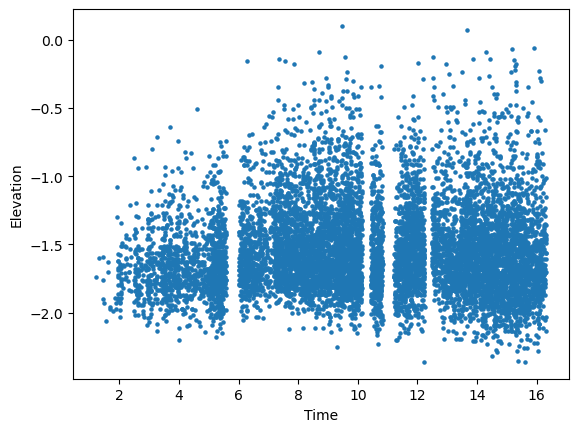

In [8]:
plt.scatter(dtF,magF,s=5)
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.show()

In [9]:
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

56.5 -126.0 2943.0


In [10]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [11]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:

        pivot_index = partition(arr1, arr2, low, high)


        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):

    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j


        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]


Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [14]:
####  Drif corrections
## Vars: MwE2, dstE2, TE2, dcE2, MwEInj, dstInj, TEInj
# M0 = 10.^(1.72*mag0+11.04);
# mag0=(2/3)*log10(M0)-6.1; 

MwE2=np.array(magF)
M0 = np.power(10,1.72*MwE2+11.04)
MwEN = 2/3.0 * np.log10(M0)-6.1


[]

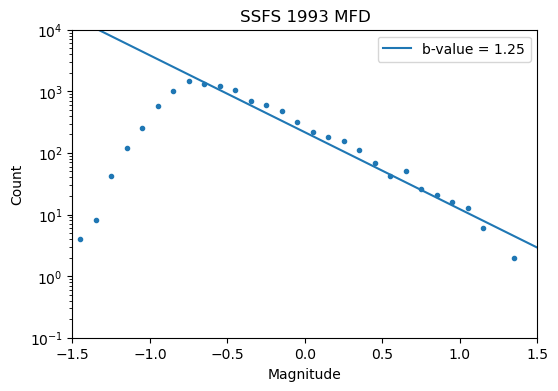

In [15]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(MwEN, bins, delta_b = 0.01)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 1993 MFD')
plt.plot()

In [16]:
hist1, bP = b_value_functions.bpos(MwEN)
print(len(hist1[0]))
print(len(hist1[1]))
print(bP)

22
23
1.2540948165519934


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2] 749


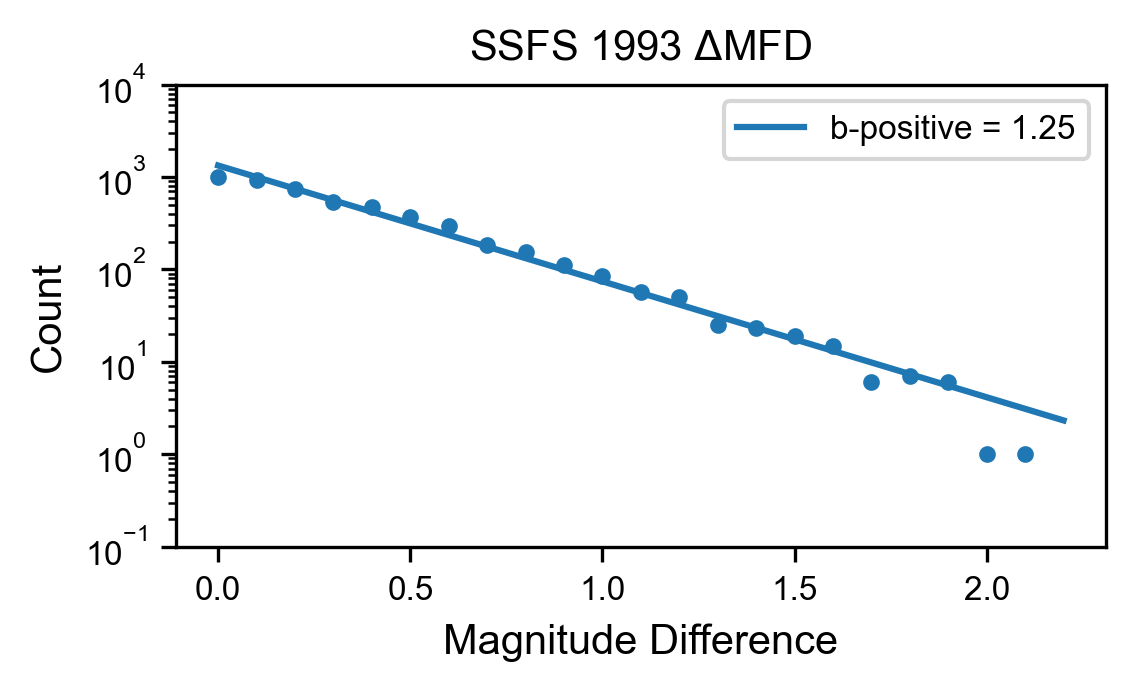

In [47]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MwEN)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [24]:
#make copy of distance array and an array referencing distance copy
dstc2 = dist.copy()
dstRef2=[]
for i in range(len(dstc2)):
    dstRef2.append(i)

In [43]:
print(len(dstc2))
print(len(dstRef2))



10080
10080


In [42]:
# sort distance array and sort reference array along with
quicksort_with_swaps(dstc2,dstRef2 , 0, len(dstc2) - 1)

In [27]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc2)):
    if count <5040:
        rDivs2[rpl].append(dstRef2[i])
        count +=1
    if count ==5040:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc2[i])
        

# quicksort_with_swaps(dcE2,dcE2Ref , 0, len(dcE2) - 1)
# quicksort_with_swaps(dcInj,dcInjRef , 0, len(dcInj) - 1)  



In [28]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])



In [29]:

rDmaxRad2.append(dstc2[len(dstc2)-1])
print(rDmaxRad2)


[np.float64(294.33866548586514), np.float64(1128.6869583724267), np.float64(1128.6869583724267)]


In [30]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]



# MwEN, MwInjN

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(MwEN[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        

0
1


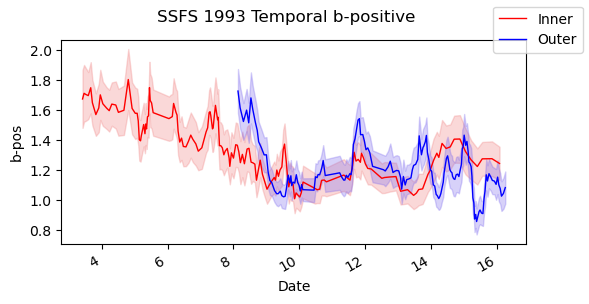

In [31]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 1993 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

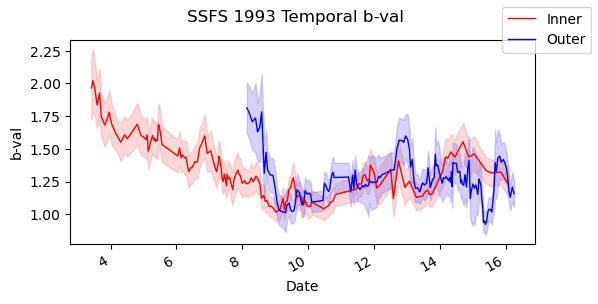

In [32]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 1993 Temporal b-val")
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-val')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

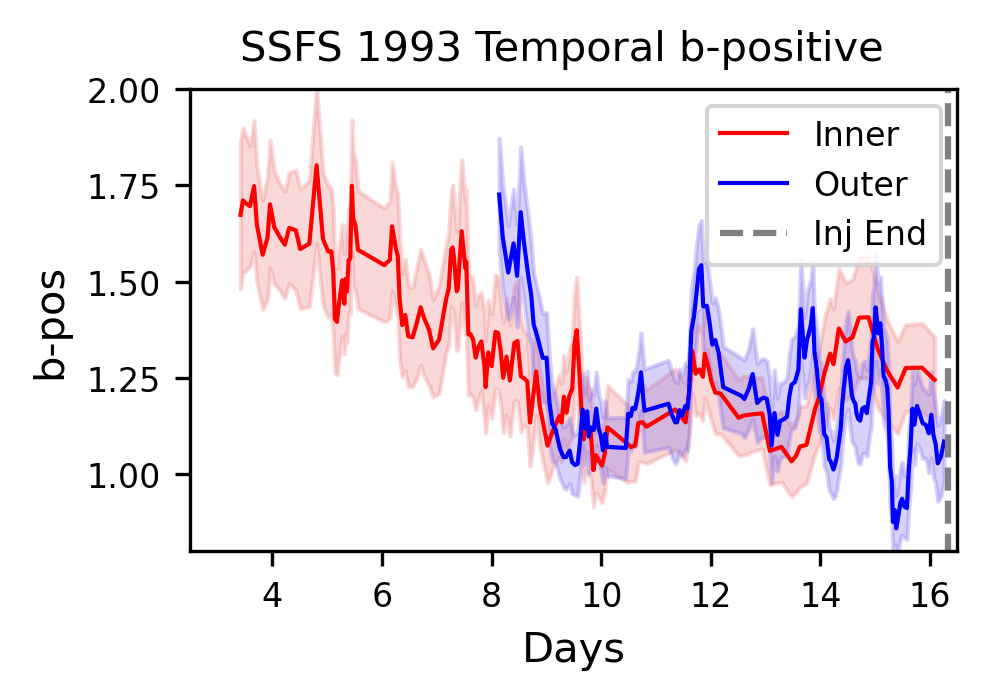

In [33]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993.png",bbox_inches='tight', pad_inches=0.05)

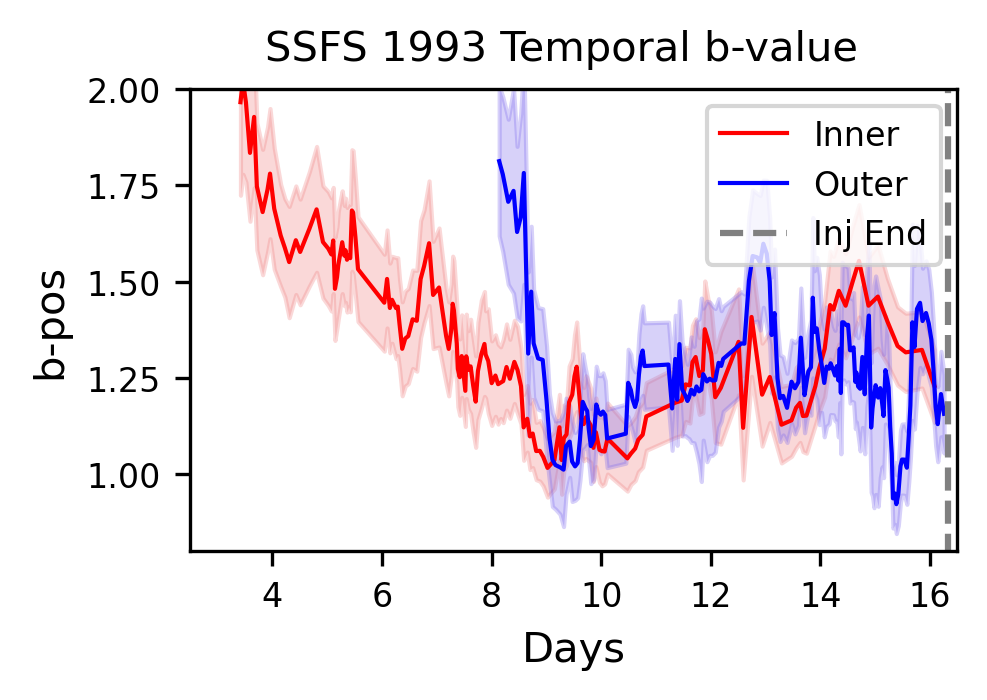

In [34]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993.png",bbox_inches='tight', pad_inches=0.05)

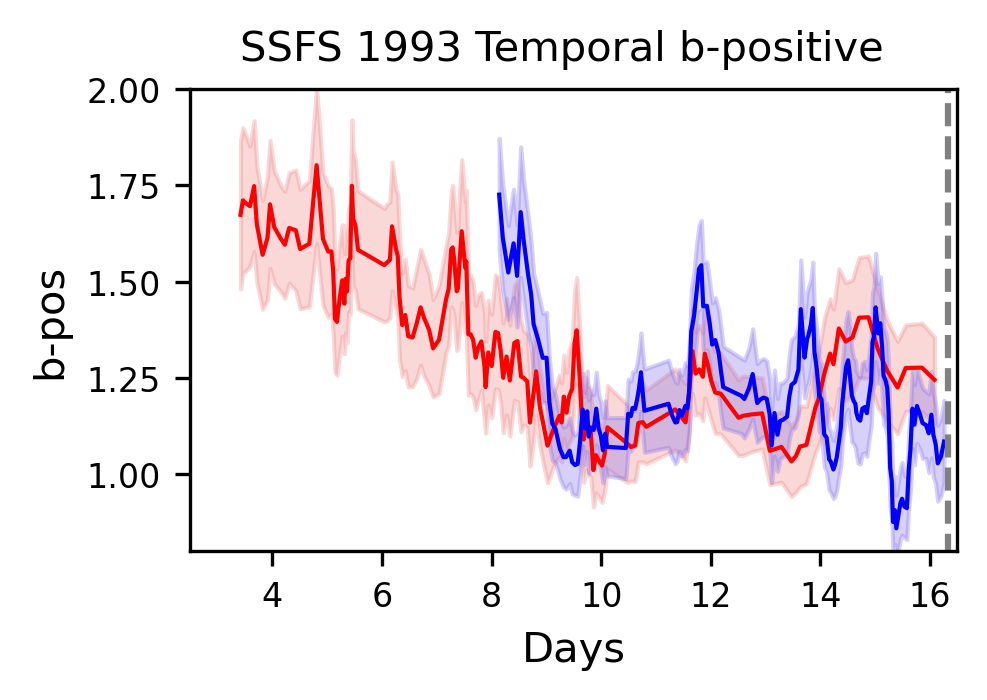

In [35]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993 sansLgnd corrected.png",bbox_inches='tight', pad_inches=0.05)

In [36]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if MwEN[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=MwEN[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if MwEN[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=MwEN[sDivs2[1][i]]

print(ioMax)

[np.float64(1.3746666666666663), np.float64(1.3402666666666665)]


In [37]:
print(rDmaxRad2[0]/rDmaxRad2[1])

0.26077971691132434


1.315819939677888 1.1897125567882758


[]

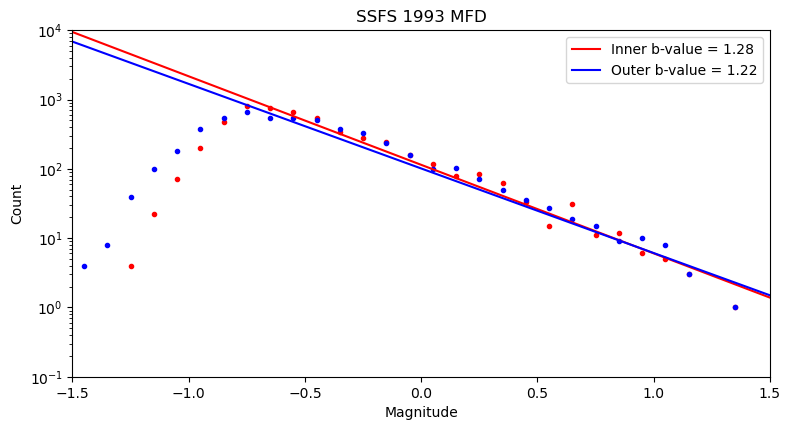

In [38]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MwEN[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MwEN[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

1.315819939677888 1.1897125567882758


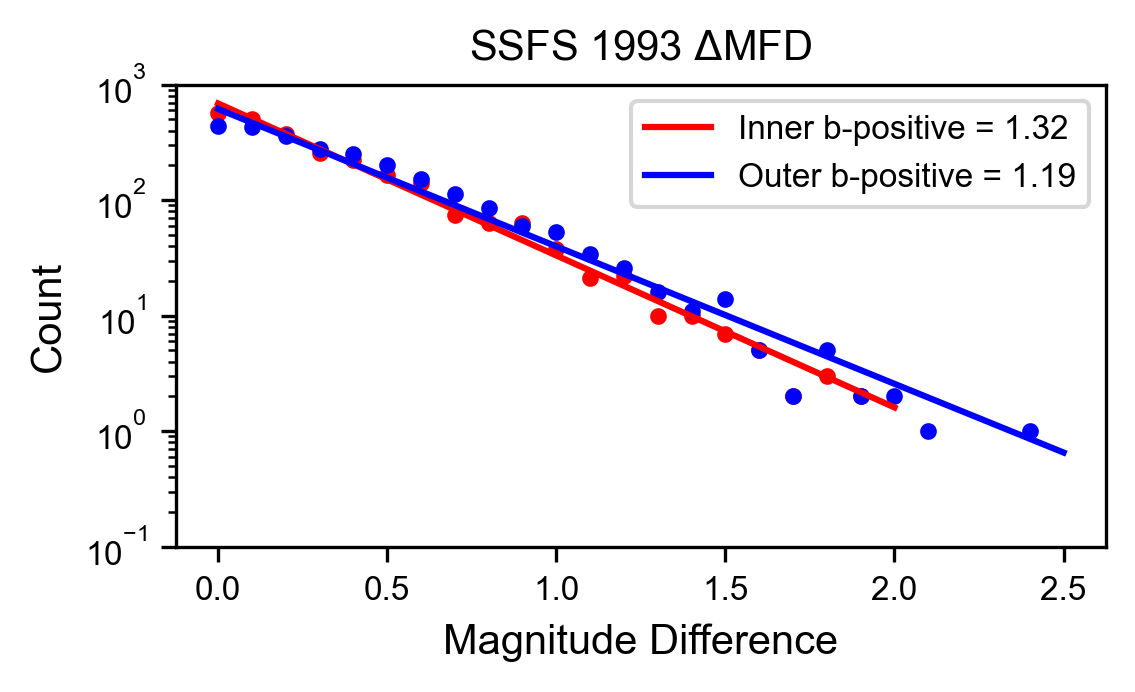

In [46]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MwEN[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MwEN[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'